<a href="https://colab.research.google.com/github/turto1se/BMSTU-VKR/blob/main/Turtoi1se_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*ВЫПУСКНАЯ КВАЛИФИКАЦИОННАЯ РАБОТА по курсу «Data Science»*

*Прогнозирование конечных свойств новых материалов
            (композиционных материалов)*

Композиционные материалы — это искусственно созданные материалы, состоящие из нескольких других с четкой границей между ними. Композиты обладают теми свойствами, которые не наблюдаются у компонентов по отдельности. При этом композиты являются монолитным материалом, т. е. компоненты материала неотделимы друг от друга без разрушения конструкции в целом.

# Библиотеки и данные

1) Подготавливаем данные

Импортируем необходимые библиотеки для обработки данных

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#2. Построение моделей для прогноза модуля упругости при растяжении и прочности при растяжении
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor

**Загрузим датасет со свойствами композитов. Произведем объединение по индексу тип объединения INNER**

In [9]:
# Датасеты хранятся в облаке "Google Drive". 
# Для импорта данных подключаемся к диску.
from google.colab import drive
drive.mount('/content/gdrive')
# Импортируем данные
x_bp=pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/VKR Dataset/X_bp.xlsx', index_col=0)
x_bp.head()
x_nup=pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/VKR Dataset/X_nup.xlsx', index_col=0)
x_nup.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,0.0,4.0,57.0
1.0,0.0,4.0,60.0
2.0,0.0,4.0,70.0
3.0,0.0,5.0,47.0
4.0,0.0,5.0,57.0


In [10]:
df = x_bp.merge(x_nup, left_index=True, right_index=True, how='inner') #Присваиваем индексы
df.head(10)# Первые 10 строк (господи, выведите решетку на отдельную клавишу)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0.0,4.0,57.0
1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
2.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,70.0
3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0
5.0,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,60.0
6.0,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,70.0
7.0,2.561475,1900.0,535.000000,111.86,22.267857,284.615385,380.0,75.0,1800.0,120.0,0.0,7.0,47.0
8.0,3.557018,1930.0,889.000000,129.00,21.250000,300.000000,380.0,75.0,1800.0,120.0,0.0,7.0,57.0
9.0,3.532338,2100.0,1421.000000,129.00,21.250000,300.000000,1010.0,78.0,2000.0,300.0,0.0,7.0,60.0


In [11]:
df.reset_index(drop=True, inplace=True) # Сбрасываем индексы

In [12]:
df.tail()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074
1022,3.808020,1890.413468,417.316232,129.183416,27.474763,300.952708,758.747882,74.309704,2856.328932,194.754342,90.0,6.078902,77.434468


In [13]:
x_bp.info() # Типы данных в датасете 

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10)
memory usage: 120.2 KB


In [14]:
x_nup.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1040 entries, 0.0 to 1039.0
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Угол нашивки, град  1040 non-null   float64
 1   Шаг нашивки         1040 non-null   float64
 2   Плотность нашивки   1040 non-null   float64
dtypes: float64(3)
memory usage: 64.8 KB


# Описательная статистика

In [15]:
df1 = x_bp.merge(x_nup, how = 'inner', left_index = True, right_index = True)
df1.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0.0,4.0,57.0
1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
2.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,70.0
3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0


In [16]:
df1.tail()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1018.0,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019.0,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020.0,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021.0,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074
1022.0,3.808020,1890.413468,417.316232,129.183416,27.474763,300.952708,758.747882,74.309704,2856.328932,194.754342,90.0,6.078902,77.434468


In [17]:
# Количество уникальных значений в каждом столбце
df1.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [18]:
df.isnull().sum() # Поиск пропусков в датафрейме.

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [19]:
df1['Угол нашивки, град'].nunique()

2

# Расчеты

Так как кол-во уникальных значений в колонке Угол нашивки равно 2, можем привести данные в этой колонке к значениям 0 и 1

Проверим кол-во элементов, где Угол нашивки равен 0 градусов

In [20]:
df1['Угол нашивки, град'][df1['Угол нашивки, град'] == 0.0].count()

520

In [21]:
df = df1.copy()

In [22]:
df = df.replace({'Угол нашивки, град': {0.0 : 0, 90.0 : 1}})
df['Угол нашивки, град'] = df['Угол нашивки, град'].astype(int)

In [23]:
df = df.rename(columns={'Угол нашивки, град' : 'Угол нашивки'})

In [24]:
df['Угол нашивки'][df['Угол нашивки'] == 0].count()

520

После преобразования колонки Угол нашивки к значениям 0 и 1, кол-во элементов, где угол нашивки равен 0 не изменилось (520 до и после преобразования)

In [25]:
df.tail()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
1018.0,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,1,9.076380,47.019770
1019.0,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,1,10.565614,53.750790
1020.0,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,1,4.161154,67.629684
1021.0,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,1,6.313201,58.261074
1022.0,3.808020,1890.413468,417.316232,129.183416,27.474763,300.952708,758.747882,74.309704,2856.328932,194.754342,1,6.078902,77.434468


In [26]:
df.duplicated().sum()

0

In [27]:
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки                            0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Пропущенные данные в датасете отсутствуют

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки                          1023 non-null   int64  
 11  Шаг нашивки

In [29]:
df.index = df.index.astype('int')

In [30]:
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [31]:
df.describe()# Характеристики признаков из датафрейма получаются с помощью команды "describe", T - транспонируем
             # Описательная статистика для каждой колонки датасета (число значений, среднее значение, стандартное отклонение, 
             # минимальное значение, верхнее значение первого квартиля, медианное значение, верхнее значение третьего квартиля,
             # максимальное значение)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,0.491691,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,0.500175,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,1.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,1.000000,14.440522,103.988901


In [32]:
sns.set_style('darkgrid')
#sns.pairplot(df, hue = 'Угол нашивки', markers=["o", "s"], diag_kind= 'auto', palette='Set2')

Попарные графики рассеяния точек не показывают какой-либо зависимости между данными

In [33]:
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

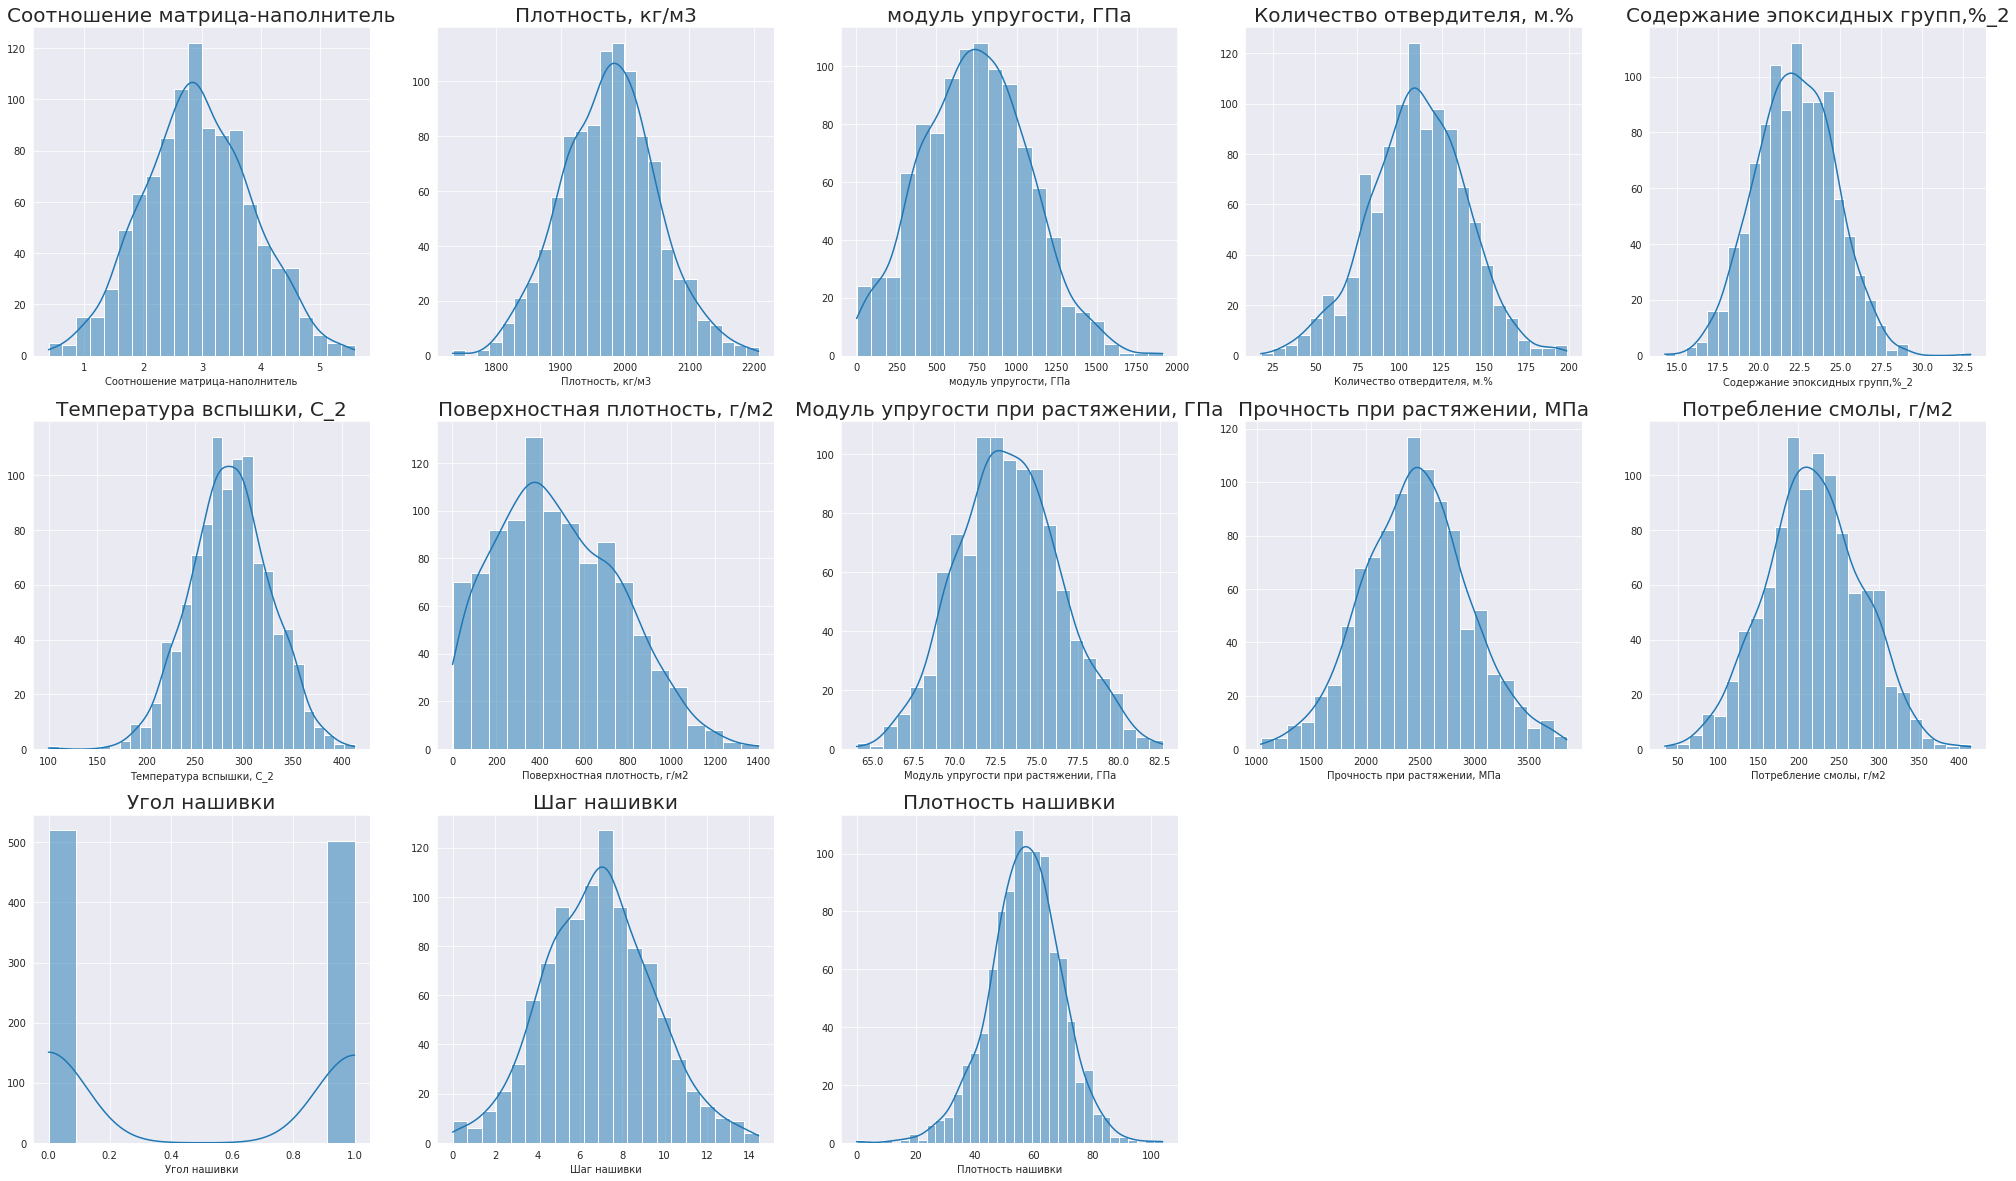

In [34]:
a = 5
b = 5
c = 1
plt.figure(figsize=(35,35))
# Функция для поочередного отображения и сохранения графиков переменных
for col in df.columns:
    plt.subplot(a, b, c)
    #plt.figure(figsize=(7,5))
    sns.histplot(data = df[col], kde=True)
    plt.ylabel(None)
    plt.title(col, size = 20)
    #plt.show()
    c+=1


In [35]:
'''
for col in df.columns:
    plt.figure(figsize=(10,5))
    plt.title('Гистограмма:'+ ' ' + col)
    plt.ylabel('Количество элементов')
    sns.histplot(data = df[col], kde=True)
    plt.show()
    print(f'Минимальное значение: {df[col].min().round(3)}')
    print(f'Максимальное значение: {df[col].max().round(3)}')
    print(f'Среднее значение: {df[col].mean().round(3)}')
    print(f'Медианное значение: {df[col].median().round(3)}')
'''

"\nfor col in df.columns:\n    plt.figure(figsize=(10,5))\n    plt.title('Гистограмма:'+ ' ' + col)\n    plt.ylabel('Количество элементов')\n    sns.histplot(data = df[col], kde=True)\n    plt.show()\n    print(f'Минимальное значение: {df[col].min().round(3)}')\n    print(f'Максимальное значение: {df[col].max().round(3)}')\n    print(f'Среднее значение: {df[col].mean().round(3)}')\n    print(f'Медианное значение: {df[col].median().round(3)}')\n"

In [36]:
import scipy
accepted_list = []
rejected_list = []

for col in df.columns:
    alpha = 0.05
    stat, p = scipy.stats.normaltest(df[col]) # Критерий согласия Пирсона
    #print('Statistics=%.3f, p-value=%.3f' % (stat, p))
    if p > alpha:
        accepted_list.append(col)
    else:
        rejected_list.append(col)
print(f'Наименование колонок с данными С нормальным распределением: {accepted_list}')
print(f'Наименование колонок с данными БЕЗ нормального распределения : {rejected_list}')

Наименование колонок с данными С нормальным распределением: ['Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругости, ГПа', 'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа', 'Потребление смолы, г/м2', 'Шаг нашивки']
Наименование колонок с данными БЕЗ нормального распределения : ['Поверхностная плотность, г/м2', 'Угол нашивки', 'Плотность нашивки']


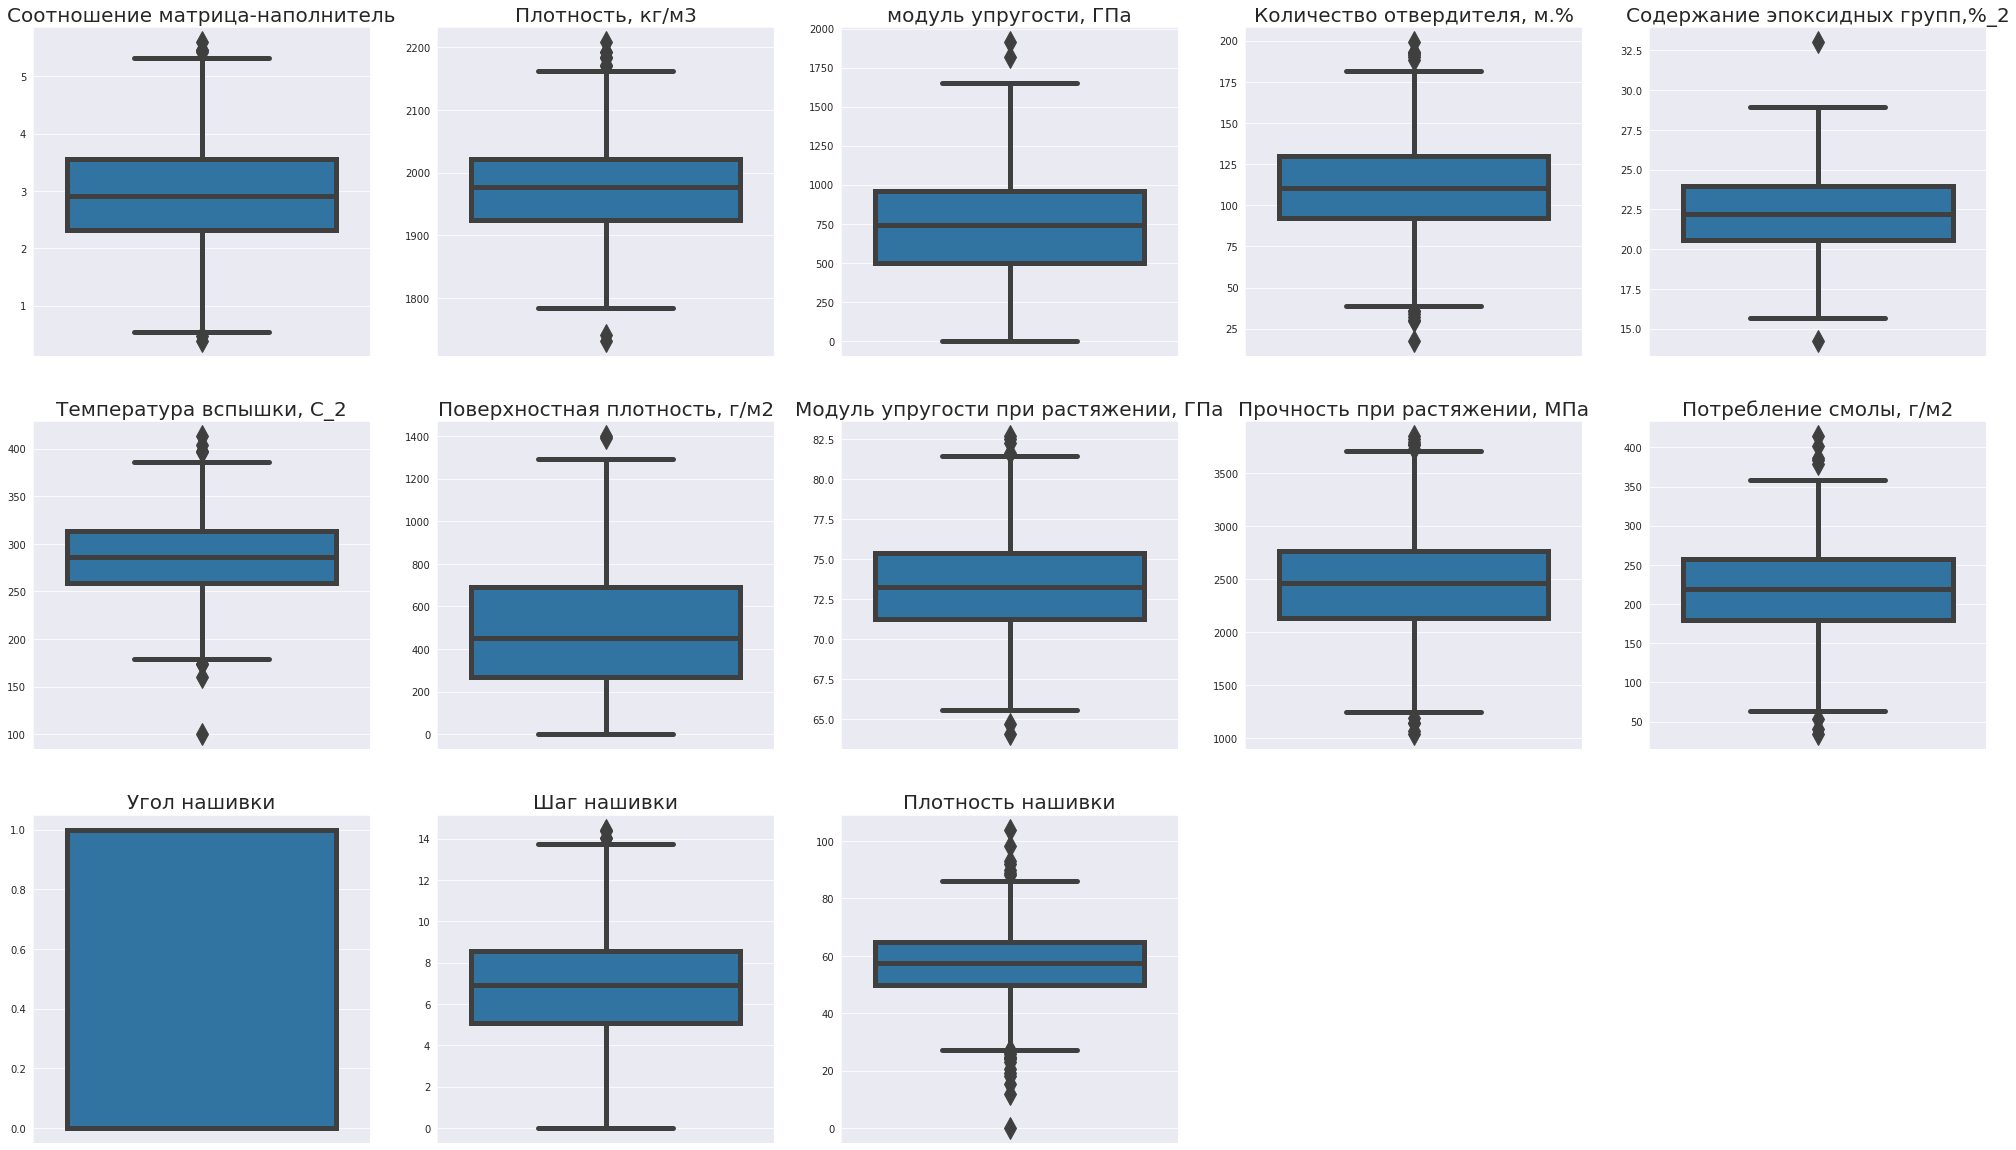

In [37]:
a = 5
b = 5
c = 1

plt.figure(figsize=(35,35))

for col in df.columns:
    plt.subplot(a, b, c)
    #plt.figure(figsize=(7,5))
    sns.boxplot(data = df, y=df[col], fliersize=15, linewidth=5)
    plt.ylabel(None)
    plt.title(col, size = 20)
    #plt.show()
    c+=1

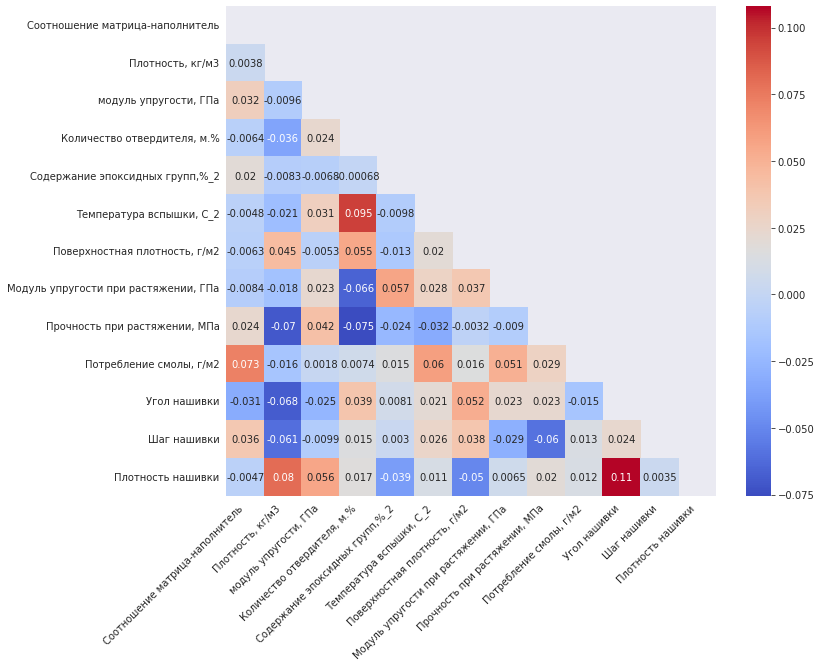

In [38]:
mask = np.triu(df.corr())
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df.corr(), mask=mask, annot=True, square=True, cmap='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.show()


Максимальная корреляция между Плотностью нашивки и углом нашивки и составляет 0.11, что говорит об отсутствии зависимости между этими данными. Корреляция между всеми параметрами очень близка к 0, что говорит об отсутствии корреляционных связей между переменными.

## Очистка данных от выбросов

Очистим данные от выбросов

In [39]:
for col in df.columns:
    q75,q25 = np.percentile(df.loc[:,col],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[col] < min,col] = np.nan
    df.loc[df[col] > max,col] = np.nan

In [40]:
df.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки                             0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

Выбросов не так много, можно их удалить

In [41]:
df = df.dropna(axis=0)

In [42]:
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки                            0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       936 non-null    float64
 1   Плотность, кг/м3                      936 non-null    float64
 2   модуль упругости, ГПа                 936 non-null    float64
 3   Количество отвердителя, м.%           936 non-null    float64
 4   Содержание эпоксидных групп,%_2       936 non-null    float64
 5   Температура вспышки, С_2              936 non-null    float64
 6   Поверхностная плотность, г/м2         936 non-null    float64
 7   Модуль упругости при растяжении, ГПа  936 non-null    float64
 8   Прочность при растяжении, МПа         936 non-null    float64
 9   Потребление смолы, г/м2               936 non-null    float64
 10  Угол нашивки                          936 non-null    float64
 11  Шаг нашивки       

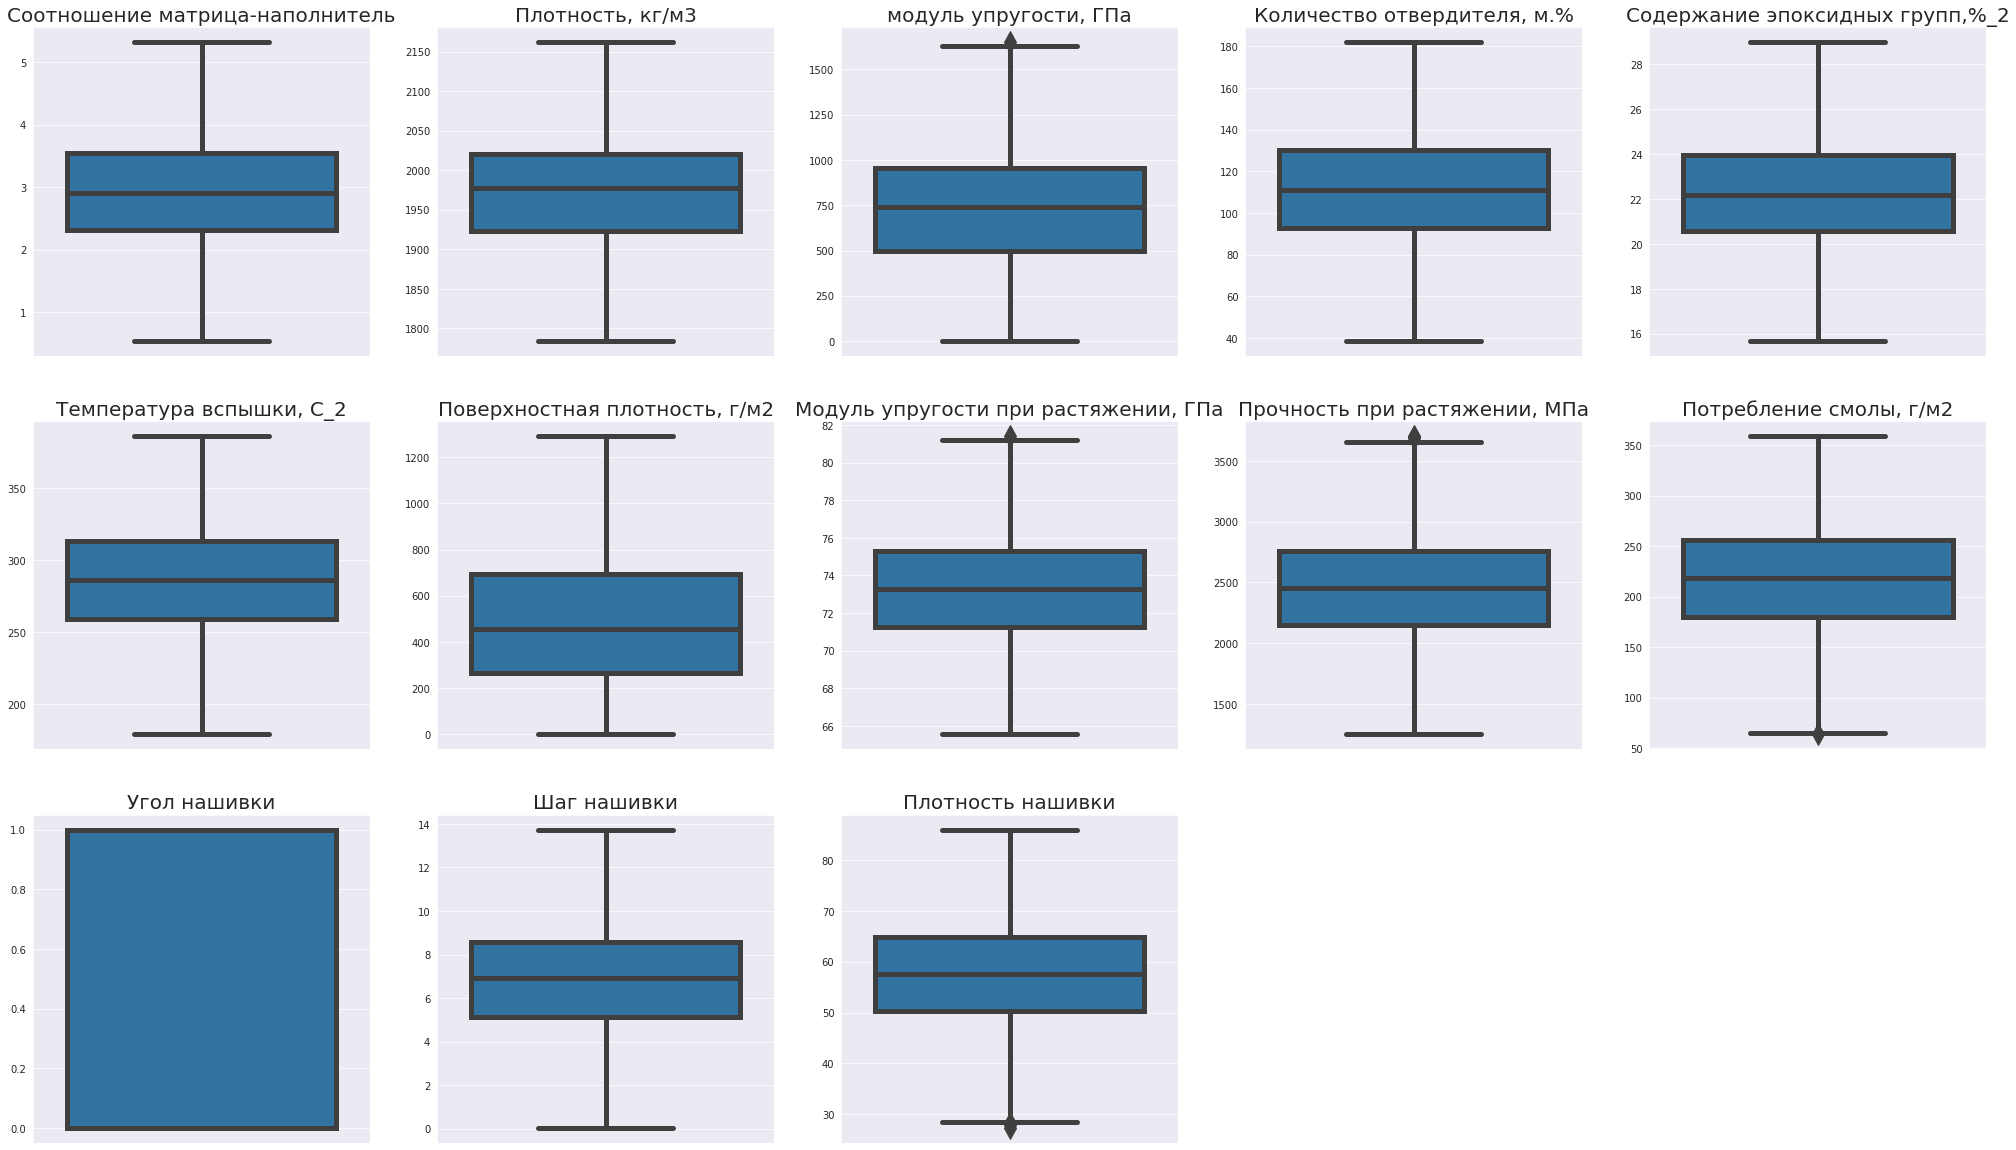

In [44]:
a = 5
b = 5
c = 1

plt.figure(figsize=(35,35))

for col in df.columns:
    plt.subplot(a, b, c)
    #plt.figure(figsize=(7,5))
    sns.boxplot(data = df, y=df[col], fliersize=15, linewidth=5)
    plt.ylabel(None)
    plt.title(col, size = 20)
    #plt.show()
    c+=1

In [45]:
'''
for col in df.columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(data = df, y=df[col])
    plt.title(col)
    plt.show()
    print(f'Минимальное значение: {df[col].min().round(3)}')
    print(f'Максимальное значение: {df[col].max().round(3)}')
    print(f'Среднее значение: {df[col].mean().round(3)}')
    print(f'Медианное значение: {df[col].median().round(3)}')
'''

"\nfor col in df.columns:\n    plt.figure(figsize=(7,5))\n    sns.boxplot(data = df, y=df[col])\n    plt.title(col)\n    plt.show()\n    print(f'Минимальное значение: {df[col].min().round(3)}')\n    print(f'Максимальное значение: {df[col].max().round(3)}')\n    print(f'Среднее значение: {df[col].mean().round(3)}')\n    print(f'Медианное значение: {df[col].median().round(3)}')\n"

Нормальзуем значения с помощью метода MinMaxScaler

In [46]:
min_max_scaler = MinMaxScaler()
df_norm = pd.DataFrame(min_max_scaler.fit_transform(df), columns = df.columns, index=df.index)

In [47]:
df_norm.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.498933,0.502695,0.446764,0.504664,0.491216,0.516059,0.373733,0.488647,0.495706,0.521141,0.511752,0.502232,0.513776
std,0.187489,0.187779,0.199583,0.188865,0.180620,0.190624,0.217078,0.191466,0.188915,0.195781,0.500129,0.183258,0.191342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.372274,0.368517,0.301243,0.376190,0.367716,0.386128,0.205619,0.359024,0.365149,0.392067,0.000000,0.372211,0.390482
50%,0.494538,0.511229,0.447061,0.506040,0.489382,0.515980,0.354161,0.485754,0.491825,0.523766,1.000000,0.504258,0.516029
75%,0.629204,0.624999,0.580446,0.637978,0.623410,0.646450,0.538683,0.615077,0.612874,0.652447,1.000000,0.624604,0.638842
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


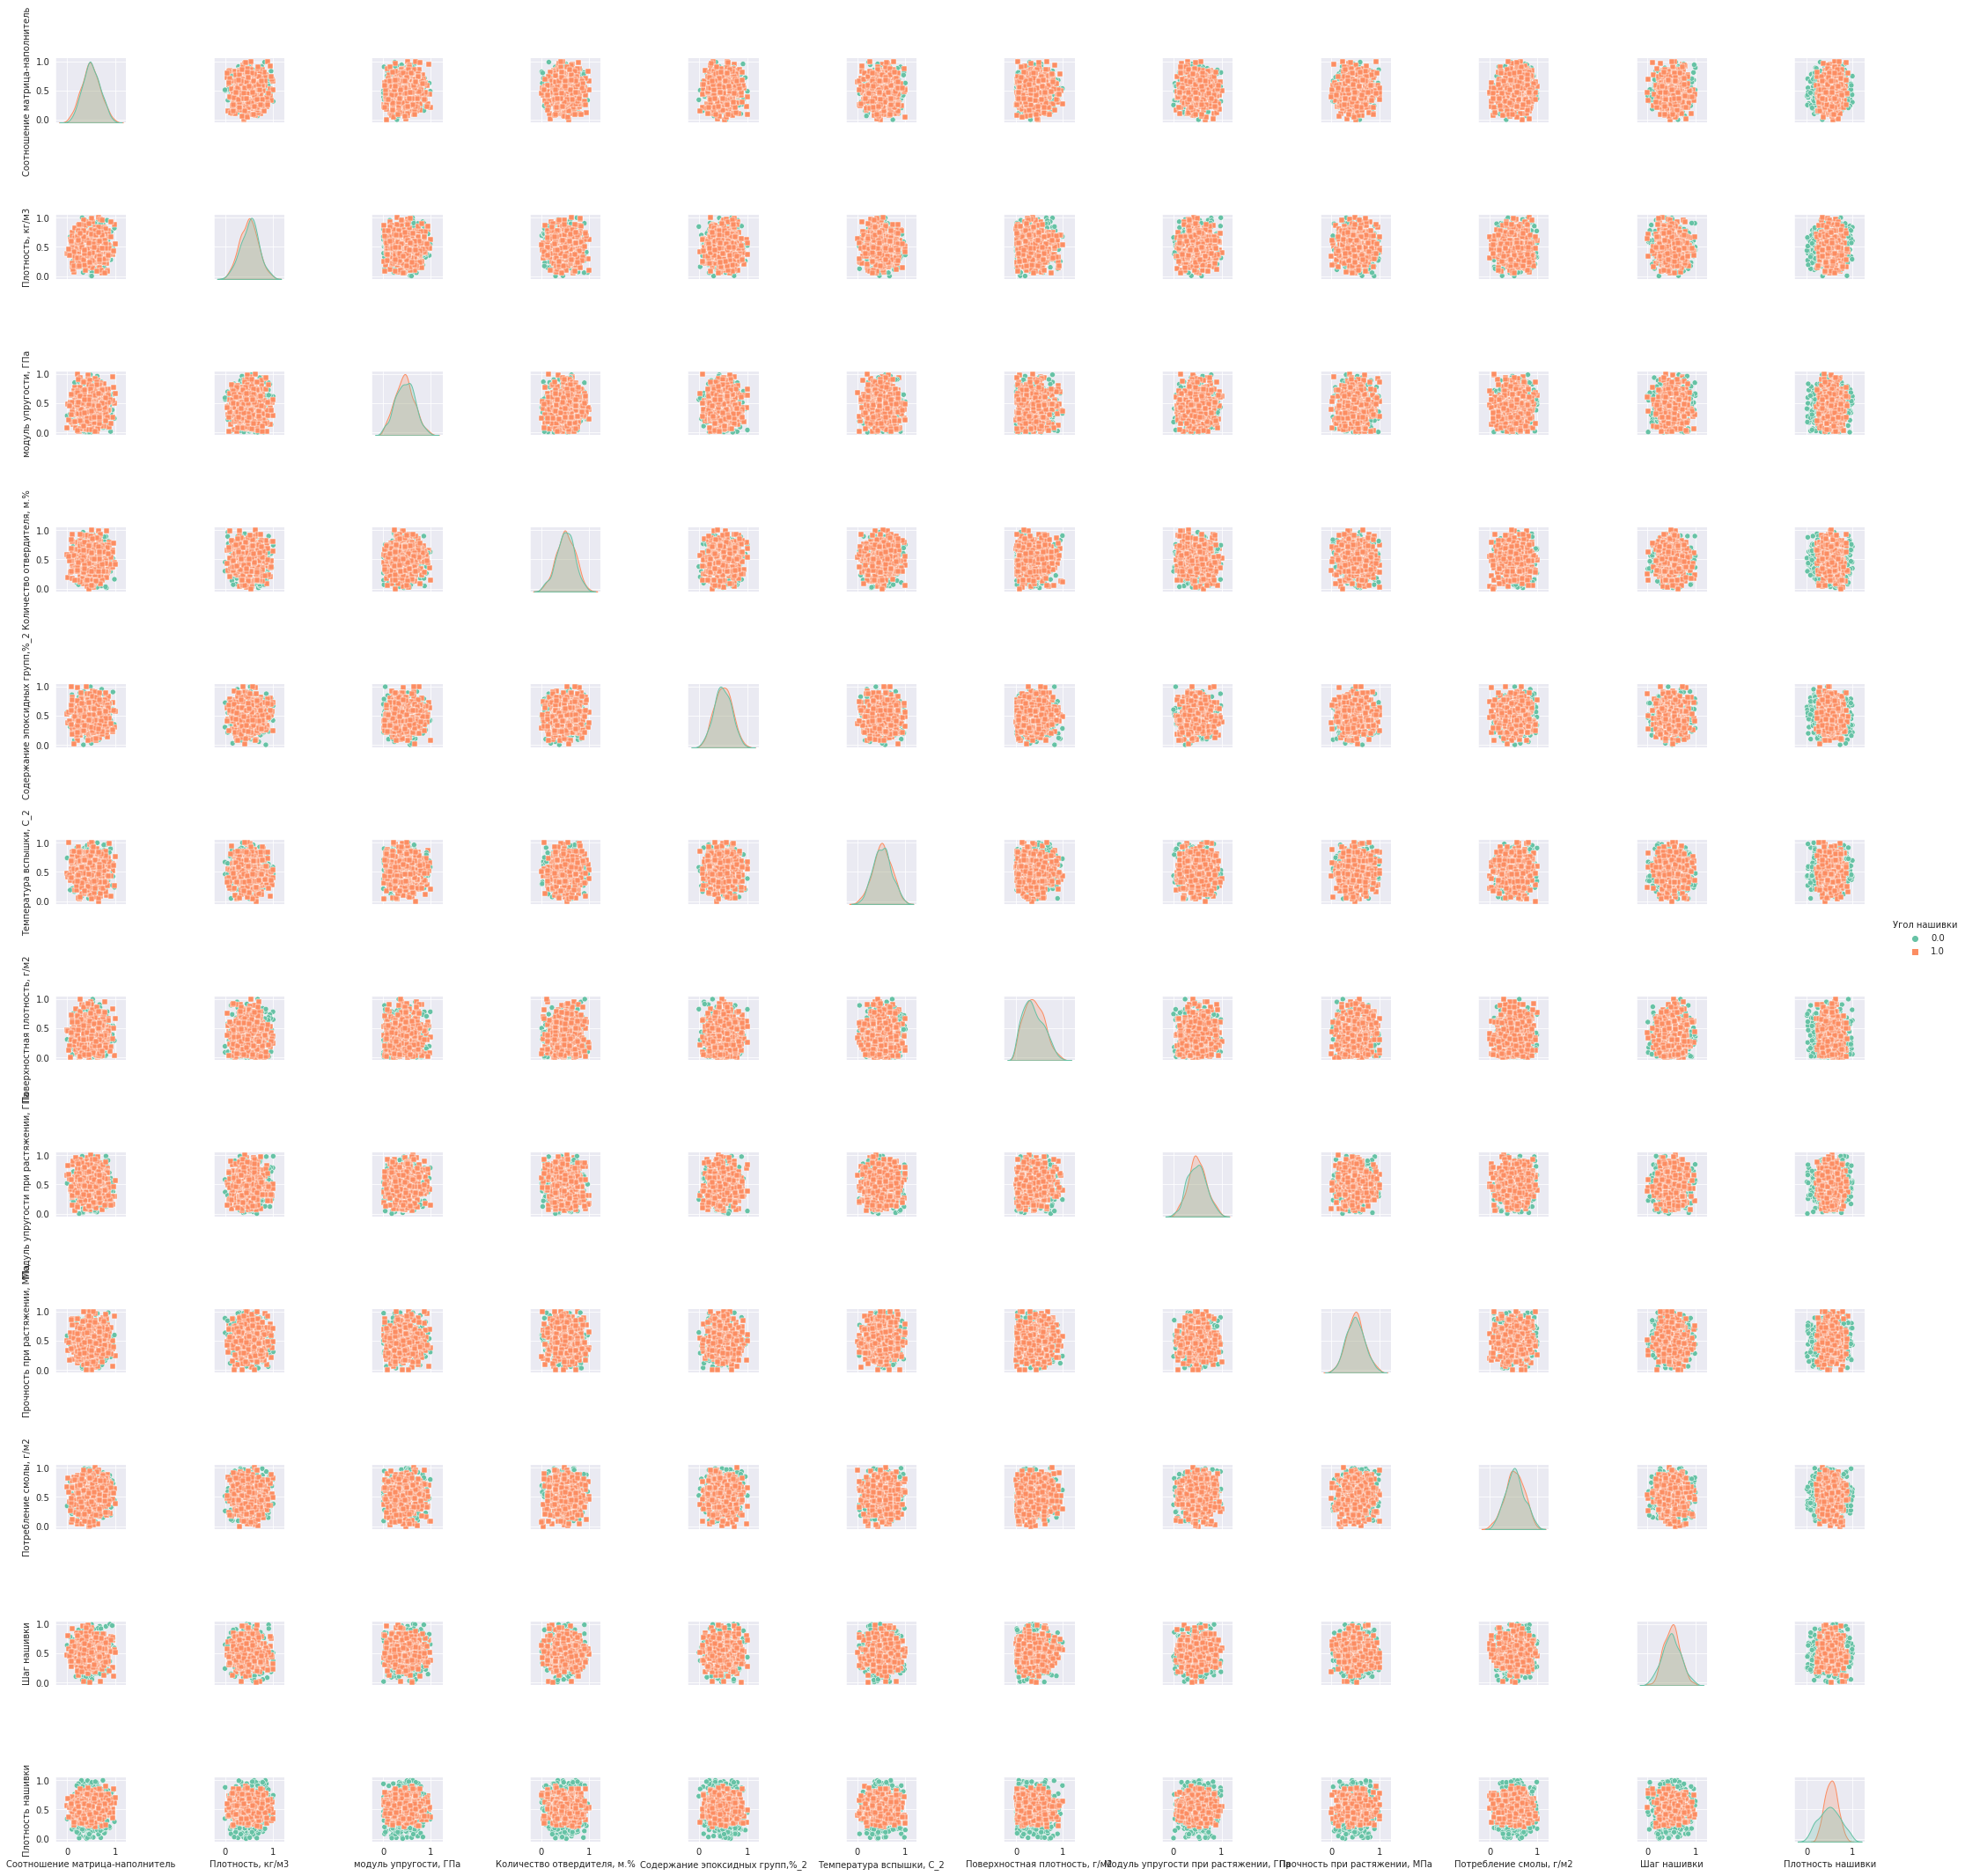

In [48]:
sns.pairplot(df_norm, hue = 'Угол нашивки', markers=["o", "s"], diag_kind= 'auto', palette='Set2') 
# Визуализация данных с помощью попарных графиков рассеивания (код выполняется 2 мин)

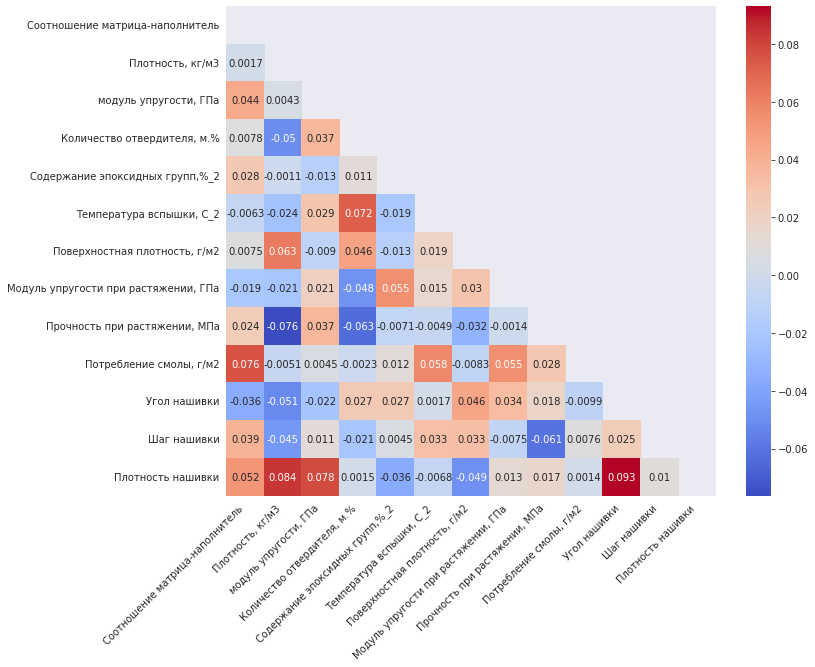

In [49]:
mask = np.triu(df_norm.corr()) # Визуализация данных с помошью корреляционной матрицы. 
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_norm.corr(), mask=mask, annot=True, square=True, cmap='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.show()

## Корреляция

Корреляция между Плотностью нашивки и углом нашивки составляет 0.11, это означает, что зависимости между этими данными нет. Корреляция между всеми параметрами очень близка к 0, что говорит об отсутствии корреляционных связей между переменными.

Разбиваем данные на обучающую и тестовую выборки

In [50]:
x_upr = df.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
x_pr = df.drop(['Прочность при растяжении, МПа'], axis=1)
y_upr = df[['Модуль упругости при растяжении, ГПа']]
y_pr = df[['Прочность при растяжении, МПа']]

X_train_upr, X_test_upr, y_train_upr, y_test_upr = train_test_split(x_upr, y_upr, test_size=0.3, random_state=1)
X_train_pr, X_test_pr, y_train_pr, y_test_pr = train_test_split(x_pr, y_pr, test_size=0.3, random_state=1)

Метод К ближайших соседей

In [51]:
knr = KNeighborsRegressor() # 2мин
knr_params = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
GSCV_knr_upr = GridSearchCV(knr, knr_params, n_jobs=-1, cv=10)
GSCV_knr_upr.fit(X_train_upr, y_train_upr)
GSCV_knr_upr.best_params_

{'algorithm': 'auto', 'n_neighbors': 177, 'weights': 'uniform'}

In [52]:
knr_upr = GSCV_knr_upr.best_estimator_
print(f'R2-score KNR для модуля упругости при растяжении: {knr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score KNR для модуля упругости при растяжении: 0.002


In [53]:
models = pd.DataFrame()

In [54]:
knr_upr_result = pd.DataFrame({
   'Model': 'KNeighborsRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, knr_upr.predict(X_test_upr)), 
   'R2 score': knr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [55]:
models = pd.concat([models, knr_upr_result])

Если коэффициент детерминации=0, это значит, что модель прогнозирует данные с таким же результатом, как если бы мы всегда брали среднее значение прогнозируемой переменной

In [56]:
GSCV_knr_pr = GridSearchCV(knr, knr_params, n_jobs=-1, cv=10) #1.3 min
GSCV_knr_pr.fit(X_train_pr, y_train_pr)
GSCV_knr_pr.best_params_

{'algorithm': 'auto', 'n_neighbors': 43, 'weights': 'uniform'}

In [57]:
knr_pr = GSCV_knr_pr.best_estimator_
print(f'R2-score KNR для прочности при растяжении: {knr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score KNR для прочности при растяжении: -0.022


In [58]:
knr_pr_result = pd.DataFrame({
   'Model': 'KNeighborsRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, knr_pr.predict(X_test_pr)), 
   'R2 score': knr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [59]:
models = pd.concat([models, knr_pr_result])

Стохастический градиентный спуск

In [60]:
sgd = SGDRegressor() #2min
sgd_params = {'loss' : ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], 
          'penalty' : ['elasticnet', 'l2', 'l1'],
          'alpha' : [0.0001, 0.001, 0.01, 0.0002, 0.002],
          'learning_rate' : ['optimal', 'invscaling', 'adaptive'],
          'epsilon' : [0.1, 0.01, 0.2, 0.02]
          }
GSCV_sgd_upr = GridSearchCV(sgd, sgd_params, cv=10, verbose=0)
GSCV_sgd_upr.fit(X_train_upr, np.ravel(y_train_upr))
GSCV_sgd_upr.best_params_

{'alpha': 0.002,
 'epsilon': 0.01,
 'learning_rate': 'adaptive',
 'loss': 'huber',
 'penalty': 'l1'}

In [61]:
sgd_upr = GSCV_sgd_upr.best_estimator_
print(f'R2-score KNR для модуля упругости при растяжении: {sgd_upr.score(X_test_upr, y_test_upr).round(3)}')
print(mean_absolute_error(y_test_upr, sgd_upr.predict(X_test_upr)))

R2-score KNR для модуля упругости при растяжении: -0.728
3.3370066232899203


In [62]:
sgd_upr_result = pd.DataFrame({
   'Model': 'SGDRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, sgd_upr.predict(X_test_upr)), 
   'R2 score': sgd_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [63]:
models = pd.concat([models, sgd_upr_result])

In [64]:
GSCV_sgd_pr = GridSearchCV(sgd, sgd_params, cv=10)
GSCV_sgd_pr.fit(X_train_pr, np.ravel(y_train_pr))
GSCV_sgd_pr.best_params_

{'alpha': 0.0002,
 'epsilon': 0.01,
 'learning_rate': 'invscaling',
 'loss': 'huber',
 'penalty': 'elasticnet'}

In [65]:
sgd_pr = GSCV_sgd_pr.best_estimator_
print(f'R2-score KNR для модуля упругости при растяжении: {sgd_pr.score(X_test_pr, y_test_pr).round(3)}')
print(mean_absolute_error(y_test_pr, sgd_pr.predict(X_test_pr)))

R2-score KNR для модуля упругости при растяжении: -0.064
379.3313163338269


In [66]:
sgd_pr_result = pd.DataFrame({
   'Model': 'SGDRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, sgd_pr.predict(X_test_pr)), 
   'R2 score': sgd_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [67]:
models = pd.concat([models, sgd_pr_result])

Если R2<0, это значит, что разработанная модель даёт прогноз даже хуже, чем простое усреднение.

Линейная регрессия

In [68]:
lr = LinearRegression()
lr_params = {
    'fit_intercept' : ['True', 'False']
}
GSCV_lr_upr = GridSearchCV(lr, lr_params, n_jobs=-1, cv=10)
GSCV_lr_upr.fit(X_train_upr, y_train_upr)
GSCV_lr_upr.best_params_

{'fit_intercept': 'True'}

In [69]:
lr_upr = GSCV_lr_upr.best_estimator_
print(f'R2-score LR для модуля упругости при растяжении: {lr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score LR для модуля упругости при растяжении: -0.021


In [70]:
lr_upr_result = pd.DataFrame({
   'Model': 'LinearRegression_upr', 
   'MAE': mean_absolute_error(y_test_upr, lr_upr.predict(X_test_upr)), 
   'R2 score': lr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [71]:
models = pd.concat([models, lr_upr_result])

In [72]:
GSCV_lr_pr = GridSearchCV(lr, lr_params, n_jobs=-1, cv=10)
GSCV_lr_pr.fit(X_train_pr, y_train_pr)
GSCV_lr_pr.best_params_

{'fit_intercept': 'True'}

In [73]:
lr_pr = GSCV_lr_pr.best_estimator_
print(f'R2-score LR для прочности при растяжении: {lr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score LR для прочности при растяжении: -0.021


In [74]:
lr_pr_result = pd.DataFrame({
   'Model': 'LinearRegression_pr', 
   'MAE': mean_absolute_error(y_test_pr, lr_pr.predict(X_test_pr)), 
   'R2 score': lr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [75]:
models = pd.concat([models, lr_pr_result])

Случайный лес

In [76]:
rfr = RandomForestRegressor() #5min
rfr_params = {
    'n_estimators' : range(10, 1000, 10),
    'criterion' : ['squared_error', 'absolute_error', 'poisson'],
    'max_depth' : range(1, 7),
    'min_samples_split' : range(20, 50, 5),
    'min_samples_leaf' : range(2, 8),
    'bootstrap' : ['True', 'False']
}
RSCV_rfr_upr = RandomizedSearchCV(rfr, rfr_params, n_jobs=-1, cv=10, verbose=4)
RSCV_rfr_upr.fit(X_train_upr, np.ravel(y_train_upr))
RSCV_rfr_upr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 160,
 'min_samples_split': 40,
 'min_samples_leaf': 3,
 'max_depth': 3,
 'criterion': 'squared_error',
 'bootstrap': 'True'}

In [77]:
rfr_upr = RSCV_rfr_upr.best_estimator_
print(f'R2-score RFR для модуля упругости при растяжении: {rfr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score RFR для модуля упругости при растяжении: -0.027


In [78]:
rfr_upr_result = pd.DataFrame({
   'Model': 'RandomForestRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, rfr_upr.predict(X_test_upr)), 
   'R2 score': rfr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [79]:
models = pd.concat([models, rfr_upr_result])

In [80]:
RSCV_rfr_pr = RandomizedSearchCV(rfr, rfr_params, n_jobs=-1, cv=10, verbose=4) #3min
RSCV_rfr_pr.fit(X_train_pr, np.ravel(y_train_pr))
RSCV_rfr_pr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 150,
 'min_samples_split': 45,
 'min_samples_leaf': 2,
 'max_depth': 1,
 'criterion': 'absolute_error',
 'bootstrap': 'True'}

In [81]:
rfr_pr = RSCV_rfr_pr.best_estimator_
print(f'R2-score RFR для прочности при растяжении: {rfr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score RFR для прочности при растяжении: -0.005


In [82]:
rfr_pr_result = pd.DataFrame({
   'Model': 'RandomForestRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, rfr_pr.predict(X_test_pr)), 
   'R2 score': rfr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [83]:
models = pd.concat([models, rfr_pr_result])

## Многослойный перцептрон

Модели не справляются с решением поставленной задачи, попробуем с помощью многослойного перцептрона из библиотеки sklearn

In [84]:
mlpr = MLPRegressor(random_state=2)
mlpr_params = {
    'hidden_layer_sizes' : [(64, 32, 12), (12, 12, 12, 12, 12),
                            (32, 32, 16, 8), (16, 16, 8)],
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['sgd', 'adam'],
    'max_iter' : [300],
    'learning_rate' : ['constant', 'adaptive', 'invscaling']
}

In [ ]:
GSCV_mlpr_upr = GridSearchCV(mlpr, mlpr_params, n_jobs=-1, cv=10) #10 min
GSCV_mlpr_upr.fit(X_train_upr, np.ravel(y_train_upr))
GSCV_mlpr_upr.best_params_

In [ ]:
mlpr_upr = GSCV_mlpr_upr.best_estimator_
print(f'R2-score MLPR для модуля упругости при растяжении: {mlpr_upr.score(X_test_upr, y_test_upr).round(3)}')

In [ ]:
mlpr_upr_result = pd.DataFrame({
   'Model': 'MLPRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, mlpr_upr.predict(X_test_upr)), 
   'R2 score': mlpr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [ ]:
models = pd.concat([models, mlpr_upr_result])

In [ ]:
GSCV_mlpr_pr = GridSearchCV(mlpr, mlpr_params, n_jobs=-1, cv=10) #10min
GSCV_mlpr_pr.fit(X_train_pr, np.ravel(y_train_pr))
GSCV_mlpr_pr.best_params_

In [ ]:
mlpr_pr = GSCV_mlpr_pr.best_estimator_
print(f'R2-score MLPR для прочности при растяжении: {mlpr_pr.score(X_test_pr, y_test_pr).round(3)}')

In [ ]:
mlpr_pr_result = pd.DataFrame({
   'Model': 'MLPRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, mlpr_pr.predict(X_test_pr)), 
   'R2 score': mlpr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [ ]:
models = pd.concat([models, mlpr_pr_result])

In [ ]:
models_sort = models.sort_values(by=['MAE', 'R2 score'])
models_sort

In [ ]:
sns.catplot(data=models_sort[0:5], x='Model', y='MAE', kind='bar', height=6, aspect=2)
plt.ylim(ymin=2.4, ymax=3.4)
plt.xticks(size=12)
plt.title('Средняя абсолютная ошибка моделей прогноза Модуля упругости при растяжении, ГПа', size=15)

In [ ]:
sns.catplot(data=models_sort[5:10], x='Model', y='MAE', kind='bar', height=6, aspect=2)
plt.ylim(ymin=360, ymax=390)
plt.xticks(size=12)
plt.title('Средняя абсолютная ошибка моделей прогноза Прочности при растяжении, МПа', size=15)

# Построение нейронной сети на Keras

3. Построение нейронной сети на Keras для предсказания Модуля упругости при растяжении, Прочности при растяжении, Соотношения матрица-наполнитель

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Activation, Dropout, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint

print(tf.__version__)

2.9.2


Нейронная сеть для прогноза модуля упругости при растяжении

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [ ]:
X_train_upr_norm = normalizer.adapt(np.array(X_train_upr))

In [ ]:
model_upr = Sequential(X_train_upr_norm)

model_upr.add(Dense(128))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(64))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(64))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(32))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(32))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(1))
model_upr.add(Activation(activation='elu'))

In [ ]:
model_upr.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False),
    loss='mean_absolute_error')

In [ ]:
%%time
history_upr = model_upr.fit(
    X_train_upr,
    y_train_upr,
    batch_size = 64,
    epochs=40,
    verbose=1,
    validation_split = 0.2
    )

Epoch 1/40
9/9 [==============================] - 2s 43ms/step - loss: 72.9359 - val_loss: 63.0476
Epoch 2/40
9/9 [==============================] - 0s 10ms/step - loss: 71.1032 - val_loss: 65.1616
Epoch 3/40
9/9 [==============================] - 0s 10ms/step - loss: 67.1166 - val_loss: 73.0829
Epoch 4/40
9/9 [==============================] - 0s 9ms/step - loss: 57.4630 - val_loss: 74.5149
Epoch 5/40
9/9 [==============================] - 0s 7ms/step - loss: 34.0080 - val_loss: 497.4398
Epoch 6/40
9/9 [==============================] - 0s 8ms/step - loss: 19.7662 - val_loss: 639.3716
Epoch 7/40
9/9 [==============================] - 0s 8ms/step - loss: 4.1862 - val_loss: 1240.4993
Epoch 8/40
9/9 [==============================] - 0s 9ms/step - loss: 3.8315 - val_loss: 1552.2682
Epoch 9/40
9/9 [==============================] - 0s 8ms/step - loss: 3.3197 - val_loss: 1051.6357
Epoch 10/40
9/9 [==============================] - 0s 9ms/step - loss: 3.1248 - val_loss: 695.2576
Epoch 11/40

In [ ]:
model_upr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64)                0

In [ ]:
#Функция для построения графика потерь модели на тренировочной и тестовой выборках
def model_loss_plot(model_history):
    plt.figure(figsize=(10, 5))
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title('График потерь модели', size=12)
    plt.ylabel('Средняя абсолютная ошибка', size=12)
    plt.xlabel('Эпоха', size=12)
    plt.legend(['loss', 'val_loss'], loc='best')
    plt.show()

#Функция для построения графика оригинального и предсказанного значения у
def actual_and_predicted_plot(original_y, predicted_y):    
    plt.figure(figsize=(10,5))
    plt.title('Тестовые и прогнозные значения', size=12)
    plt.plot(original_y, color='blue', label = 'Тестовые значения')
    plt.plot(predicted_y, color='red', label = 'Прогнозные значения')
    plt.legend(loc='best')
    plt.show()

#Функция для построения точечного графика оригинального и предсказанного значения у   
def actual_and_predicted_scatter(original_y, predicted_y):
    plt.figure(figsize=(10,5))
    plt.title('Рассеяние тестовых и прогнозных значений', size=15)
    plt.scatter(original_y, predicted_y)
    plt.xlabel('Тестовые значения', size=12)
    plt.ylabel('Прогнозные значения', size=12)
    plt.show()

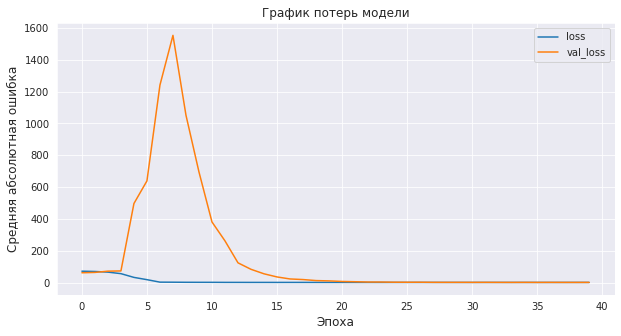

In [ ]:
model_loss_plot(history_upr)

9/9 [==============================] - 0s 2ms/step


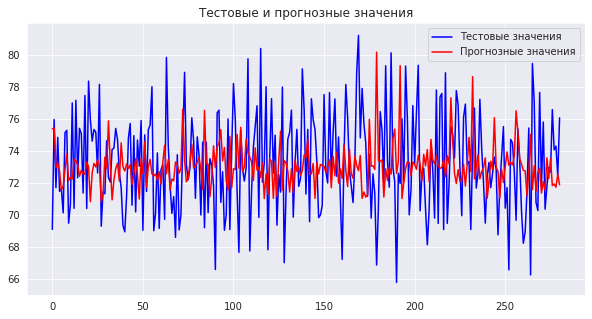

In [ ]:
pred_upr = model_upr.predict(np.array((X_test_upr)))
original_upr = y_test_upr.values
predicted_upr = pred_upr

actual_and_predicted_plot(original_upr, predicted_upr)

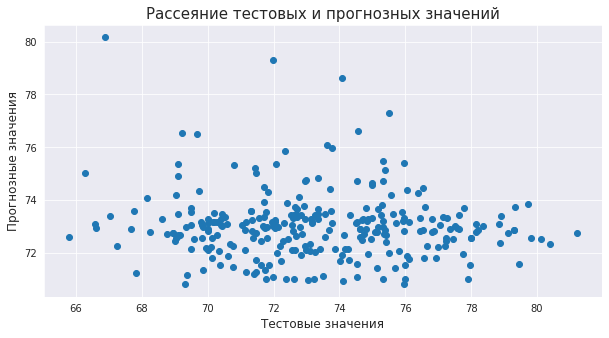

In [ ]:
actual_and_predicted_scatter(original_upr, predicted_upr)

In [ ]:
print(f'Model MAE: {model_upr.evaluate(X_test_upr, y_test_upr, verbose=1)}')

9/9 [==============================] - 0s 4ms/step - loss: 2.7350
Model MAE: 2.735032081604004


In [ ]:
print(f'MAE среднего значения: {np.mean(np.abs(y_test_upr-np.mean(y_test_upr)))}')

MAE среднего значения: Модуль упругости при растяжении, ГПа    2.516456
dtype: float64


## Нейронная сеть для прогноза прочности при растяжении

In [ ]:
X_train_pr_norm = normalizer.adapt(np.array(X_train_pr))

In [ ]:
model_pr = Sequential(X_train_pr_norm)

model_pr.add(Dense(128))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(64))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(64))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(32))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(1))
model_pr.add(Activation('selu'))

In [ ]:
early_pr = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')

In [ ]:
model_pr.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.01),
    loss='mean_absolute_error'
    )

In [ ]:
%%time
history_pr = model_pr.fit(
    X_train_pr,
    y_train_pr,
    batch_size = 32,
    epochs=300,
    verbose=1,
    validation_split = 0.2,
    callbacks=[early_pr])

Epoch 1/300
17/17 [==============================] - 3s 35ms/step - loss: 2489.9749 - val_loss: 2424.9524
Epoch 2/300
17/17 [==============================] - 0s 9ms/step - loss: 2488.8118 - val_loss: 2427.9399
Epoch 3/300
17/17 [==============================] - 0s 11ms/step - loss: 2487.7646 - val_loss: 2430.8445
Epoch 4/300
17/17 [==============================] - 0s 8ms/step - loss: 2486.4905 - val_loss: 2434.0574
Epoch 5/300
17/17 [==============================] - 0s 5ms/step - loss: 2484.9568 - val_loss: 2435.2444
Epoch 6/300
17/17 [==============================] - 0s 6ms/step - loss: 2482.9272 - val_loss: 2436.4370
Epoch 7/300
17/17 [==============================] - 0s 5ms/step - loss: 2480.3206 - val_loss: 2436.3477
Epoch 8/300
17/17 [==============================] - 0s 6ms/step - loss: 2476.8984 - val_loss: 2434.7563
Epoch 9/300
17/17 [==============================] - 0s 7ms/step - loss: 2472.3469 - val_loss: 2438.7239
Epoch 10/300
17/17 [==============================] -

In [ ]:
model_pr.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1664      
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_6 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 64)               

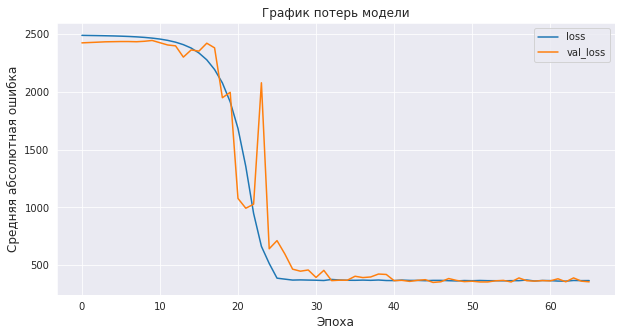

In [ ]:
model_loss_plot(history_pr)

9/9 [==============================] - 0s 3ms/step


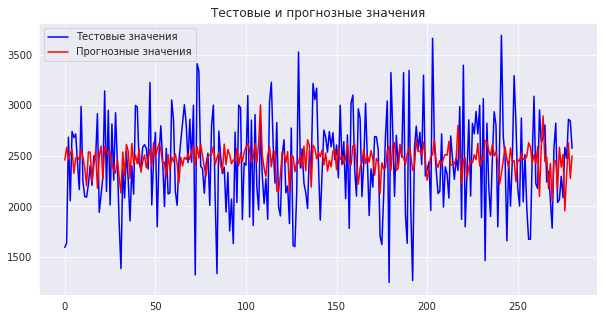

In [ ]:
pred_pr = model_pr.predict(np.array((X_test_pr)))
original_pr = y_test_pr.values
predicted_pr = pred_pr

actual_and_predicted_plot(original_pr, predicted_pr)

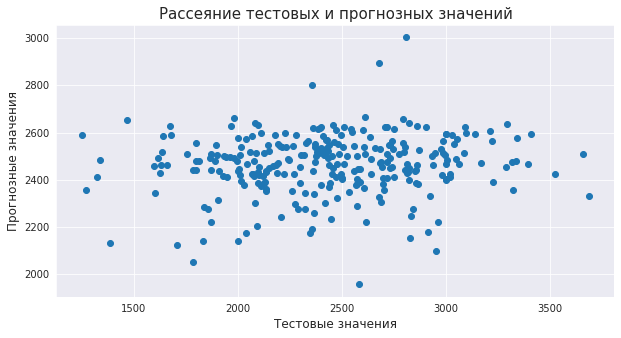

In [ ]:
actual_and_predicted_scatter(original_pr, predicted_pr)

In [ ]:
print(f'Model MAE: {model_pr.evaluate(X_test_pr, y_test_pr)}')

9/9 [==============================] - 0s 3ms/step - loss: 371.4723
Model MAE: 371.4722595214844


In [ ]:
print(f'MAE среднего значения: {np.mean(np.abs(y_test_pr-np.mean(y_test_pr)))}')

MAE среднего значения: Прочность при растяжении, МПа    365.355605
dtype: float64


## Нейронная сеть для предсказания соотношения матрица-наполнитель

In [ ]:
x_mn = df.drop(['Соотношение матрица-наполнитель'], axis=1)
y_mn = df[['Соотношение матрица-наполнитель']]

X_train_mn, X_test_mn, y_train_mn, y_test_mn = train_test_split(x_mn, y_mn, test_size=0.3, random_state=1)

In [ ]:
X_train_mn_norm = normalizer.adapt(np.array(X_train_mn))

In [ ]:
model_mn = Sequential(X_train_mn_norm)

model_mn.add(Dense(128))
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dense(128, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(64, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(32, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dense(16, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(1))
model_mn.add(Activation('selu'))

In [ ]:
early_mn = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [ ]:
model_mn.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.02, momentum=0.5),
    loss='mean_absolute_error')

In [ ]:
%%time
history_mn = model_mn.fit(
    X_train_mn,
    y_train_mn,
    batch_size = 64,
    epochs=100,
    verbose=1,
    validation_split = 0.2,
    callbacks = [early_mn]
    )

Epoch 1/100
9/9 [==============================] - 2s 36ms/step - loss: 2.4353 - val_loss: 2.0849
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 1.9414 - val_loss: 1.6131
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 1.5303 - val_loss: 2.5746
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 1.3637 - val_loss: 1.0691
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 1.0686 - val_loss: 0.8519
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 0.7914 - val_loss: 1.4244
Epoch 7/100
9/9 [==============================] - 0s 8ms/step - loss: 0.7604 - val_loss: 0.9653
Epoch 8/100
9/9 [==============================] - 0s 9ms/step - loss: 0.7204 - val_loss: 0.8823
Epoch 9/100
9/9 [==============================] - 0s 7ms/step - loss: 0.7257 - val_loss: 1.0818
Epoch 10/100
9/9 [==============================] - 0s 7ms/step - loss: 0.7092 - val_loss: 0.8492
Epoch 11/100
9/9 [==========

In [ ]:
model_mn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               1664      
                                                                 
 batch_normalization_9 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_10 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_13 (Dense)            (None, 64)               

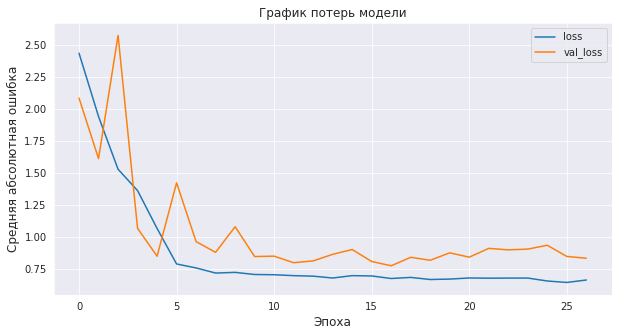

In [ ]:
model_loss_plot(history_mn)

9/9 [==============================] - 0s 5ms/step


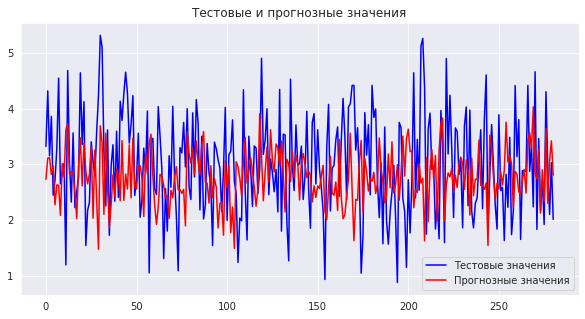

In [ ]:
pred_mn = model_mn.predict(np.array((X_test_mn)))
original_mn = y_test_mn.values
predicted_mn = pred_mn

actual_and_predicted_plot(original_mn, predicted_mn)

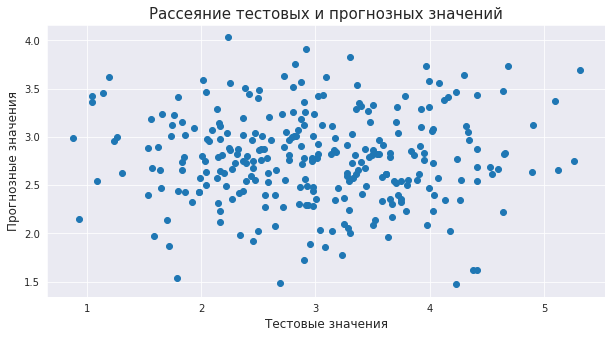

In [ ]:
actual_and_predicted_scatter(original_mn, predicted_mn)

In [ ]:
print(f'Model MAE: {model_mn.evaluate(X_test_mn, y_test_mn)}')

9/9 [==============================] - 0s 3ms/step - loss: 0.8562
Model MAE: 0.856235682964325


In [ ]:
print(f'MAE среднего значения: {np.mean(np.abs(y_test_mn-np.mean(y_test_mn)))}')

MAE среднего значения: Соотношение матрица-наполнитель    0.741688
dtype: float64


Если коэффициент детерминации близок к 1, это указывает на то, что модель работает очень хорошо (имеет высокую значимость), а если к 0, то это означает низкую значимость модели, когда входная переменная плохо "объясняет" поведение выходной, т.е. линейная зависимость между ними отсутствует. Очевидно, что такая модель будет иметь низкую эффективность. В некоторых случаях коэффициент детерминации может принимать небольшие отрицательные значения, если модель получилась "бесполезной" и ее предсказания хуже, чем оценки на основе среднего значения.
Обученные модели не решают поставленных задачпрогнозирования модуля упругости при растяжении и прочности при растяжении композиционных материалов. Все модели неудовлетворительно описывают исходные данные. Построенные и обученные нейронные сети также не справились с задачей рекомендации соотношения матрица-наполнитель.

##Тест точности определения модели на вымышленном наборе данных.

In [ ]:
a2 = np.array(X_train_mn)

In [ ]:
model_mn.predict(a2)

21/21 [==============================] - 0s 2ms/step


array([[2.3328872],
       [2.7474246],
       [2.425789 ],
       [1.898029 ],
       [2.5294592],
       [2.0758443],
       [2.7292023],
       [3.5197856],
       [2.958757 ],
       [3.0094857],
       [2.3146129],
       [1.5971609],
       [2.900372 ],
       [2.4575698],
       [2.7905416],
       [2.896703 ],
       [3.60557  ],
       [3.320018 ],
       [2.9741602],
       [2.7072954],
       [3.205906 ],
       [2.6465964],
       [1.8114077],
       [2.5701401],
       [2.863616 ],
       [3.0983639],
       [2.9081388],
       [2.604968 ],
       [2.6576562],
       [2.9155867],
       [2.9999378],
       [2.383981 ],
       [3.2458127],
       [3.4816875],
       [3.3334467],
       [3.0360708],
       [2.1654952],
       [2.6213555],
       [3.0116706],
       [2.670153 ],
       [2.5332904],
       [2.4039054],
       [2.4823284],
       [2.510785 ],
       [3.2922165],
       [2.2523289],
       [3.3217456],
       [3.1574068],
       [1.8168713],
       [2.9480479],


In [ ]:
a1 = np.array(X_test_mn)

In [ ]:
model_mn.predict(a1)

9/9 [==============================] - 0s 4ms/step


array([[2.7277133],
       [3.109301 ],
       [3.1151829],
       [2.8166206],
       [2.9699051],
       [2.2702134],
       [2.6265054],
       [2.6196814],
       [2.079164 ],
       [3.012065 ],
       [2.776534 ],
       [3.6196005],
       [3.729881 ],
       [2.823347 ],
       [2.86954  ],
       [2.822531 ],
       [2.494756 ],
       [2.026089 ],
       [2.966579 ],
       [3.4749641],
       [2.6111798],
       [3.3792365],
       [2.8799872],
       [2.6465852],
       [2.8199425],
       [3.3185167],
       [2.031218 ],
       [3.253862 ],
       [2.3362074],
       [1.4708683],
       [3.6896763],
       [3.371625 ],
       [2.0984547],
       [3.5549002],
       [2.612853 ],
       [1.8666277],
       [2.2789516],
       [2.8094366],
       [2.4199111],
       [2.916961 ],
       [2.8013072],
       [2.3427386],
       [3.423069 ],
       [2.3494515],
       [2.8217149],
       [2.5544848],
       [3.347101 ],
       [2.3934147],
       [3.468517 ],
       [2.598224 ],


In [ ]:
#сохраним модель
model_path_mn = 'my_models/model_mn'

In [ ]:
model_mn.save(model_path_mn)

In [ ]:
model_mn.save_weights('my_models/model_mn/weights')

# Приложение


In [ ]:
from flask import Flask, request, render_template
from keras.models import load_model
import pandas as pd
import joblib


app = Flask(__name__)


@app.route('/', methods=['GET', 'POST'])
def compute():
    text_result = ''
    error = dict()
    if request.method == 'POST':
        data = request.form
        try:
            data1 = {k:[float(v)] for k,v in data.items()}
        except ValueError:
            for k,v in data.items():
                try:
                    float(v)
                except ValueError:
                    error['name'] = k
                    error['value'] = v
                    break
        if not error:
            input = pd.DataFrame(data=data1)
            result = model.predict(input)[0][0]
            text_result = '{column} = {data:.5f}'.format(column='Соотношение матрица-наполнитель', data=result)
    return render_template('index.html', result=text_result, error=error)


if __name__ == '__main__':
    model = load_model('/content/my_models/model_mn')
    app.run(host='localhost', port=8081, debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


INFO:werkzeug: * Running on http://localhost:8081/ (Press CTRL+C to quit)
INFO:werkzeug: * Restarting with stat
